In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# duoti sąrašai:
# su map () ir savo pasirašyta funkcija sugeneruokite naujus sąrašus, kur 
# būtų simbolių kiekiai iš sąrašų x ir y.
# advanced: skaidrėse susiraskite prie if'o is operatorių ir pavyzdžius su type()
# ir sugeneruokite naują sąrašą iš z'o:
# kur tekstas - tai suskaičiuojate simbolių kiekį, kur skaičius - padauginate iš 2.5
# kur sąrašas - randate sąrašo skaičiųą sumą

x = [12,16,17,1,0,-1,-8,10,14]
y = ["Vilnius", 1323, 'Kaunas', 'Alytus', 'omega', -42, 42]
z = ["Vilnius", 1323,[4,5,6], 'Kaunas', 'Alytus', 'omega', -42, 42, [1,2,3]]

x2 = []
y2 = []
z2 = []

# x2 = [len(str(skaicius)) for skaicius in x]
# print(f'{"x2 sąrašas:"} {x2}')

# y2 = [len(str(skaicius)) for skaicius in y]
# print(f'{"y2 sąrašas:"} {y2}')

def simbolis(elementas):
    return len(str(elementas))

x2 = list(map(simbolis,x))
print(x2)

y2 = list(map(simbolis,y))
print(y2)

def veiksmai(elementas):
    if type(elementas) is str:
        return len(str(elementas))
    elif type(elementas) is int:
        return float(elementas)*2.5
    elif type(elementas) is list:
        return sum(elementas)

z2 = list(map(veiksmai,z))
print(z2)

[2, 2, 2, 1, 1, 2, 2, 2, 2]
[7, 4, 6, 6, 5, 3, 2]
[7, 3307.5, 15, 6, 6, 5, -105.0, 105.0, 6]


In [47]:
s = 'A'
lst = []
dct = {}
sets = set()
flt = 1.0
intgr = 7
tpl = (7,)
print(type(s), type(s) is str)
print(type(lst), type(lst) is list)
print(type(dct), type(dct) is dict)
print(type(sets), type(sets) is set)
print(type(flt), type(flt) is float)
print(type(intgr), type(intgr) is int)
print(type(tpl), type(tpl) is tuple)

<class 'str'> True
<class 'list'> True
<class 'dict'> True
<class 'set'> True
<class 'float'> True
<class 'int'> True
<class 'tuple'> True


In [105]:
miestai = pd.read_excel('miestai.xlsx')
miestai.head(10)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
0,Vilnius,0,1323 m.,1387 m.,16,557440
1,Kaunas,102,1361 m.,1408 m.,13,286763
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898
3,Šiauliai,213,1236 m.,1713 m.,14,100119
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148
5,Alytus,101,1377 m.,1581 m.,7,50421
6,Marijampolė,138,1667 m.,1792 m.,9A,35253
7,Mažeikiai,291,1501,1924 m.,7A,32711
8,Jonava,102,1740 m.,1924 m.,13,26715
9,Utena,96,1261 m.,1924–1926 m.,10,25496


In [ ]:
# Pridėkite du naujus stulpelius: Miesto amžius bei kiek metų jis turi miesto teises.
# Su query() atrinkite miestus, kuriuose yra daugiau nei 50 tūkst žmonių,
# raskite žmonių kiekio vidurkį.
# Atrinkite miestus, įkurtus seniau, nei 1500 m, ir raskite bendrą gyventojų skaičių 
# šiuose miestuose.
# kur metu tarpas 1257–1258 - imti pirmus metus.

In [121]:
# Pridėkite du naujus stulpelius: Miesto amžius bei kiek metų jis turi miesto teises.

def miesto_amzius(metai):
    return 2024-float(str(metai)[:4])

miestai['Miesto amžius']=miestai['Paminėjimo metai'].apply(miesto_amzius)
miestai.head(10)

def miesto_teises(metai):
    try:
        return 2024-int(str(metai)[:4])
    except:
        return "-1"

miestai['Miesto teises turi']=miestai['Gautos miesto teisės'].apply(miesto_teises)
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Miesto amžius,Miesto teisės,Miesto teises turi
0,Vilnius,0,1323 m.,1387 m.,16,557440,701.0,-1,637
1,Kaunas,102,1361 m.,1408 m.,13,286763,663.0,-1,616
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,772.0,-1,767
3,Šiauliai,213,1236 m.,1713 m.,14,100119,788.0,-1,311
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,521.0,-1,233


In [157]:
# Su query() atrinkite miestus, kuriuose yra daugiau nei 50 tūkst žmonių,
# raskite žmonių kiekio vidurkį.

gyventoju_vidurkis = miestai.query('`Gyventojų skaičius` >= 50000')['Gyventojų skaičius'].mean().round(0) # kai qyery'je stulpelio pavadinime kei zodziai- dedam ta teksta tarp ``
print(f'{"Miestuose, kurių gyventojų skaičius yra daugiau negu 50k, gyventojų vidurkis:"} {gyventoju_vidurkis}')

Miestuose, kurių gyventojų skaičius yra daugiau negu 50k, gyventojų vidurkis: 204965.0


In [139]:
# Atrinkite miestus, įkurtus seniau, nei 1500 m, ir raskite bendrą gyventojų skaičių 
# šiuose miestuose.

gyventoju_skaicius_1500 = miestai.query('`Miesto amžius` >= 524')['Gyventojų skaičius'].sum()

print(f'{"Miestuose, kurie įkurti iki 1500m, bendras gyventojų skaičius:"} {gyventoju_skaicius_1500}')

Miestuose, kurie įkurti iki 1500m, bendras gyventojų skaičius: 1463422


In [140]:
# LENTELIU JUNGIMAS

# inner jungimo budas kai sujungiami tik sutamptantys elementai is lenteliu, isskirtiniiai neitraukiami
# left jungimo budas- viskas lieka is kairisios lenteles, is desiniosios atkeliauja tik sutampancios eilutes. Kai desineje eilutekje duomenu prie elemto nera- iraso null, jei irasas yra tik desineje lenteleje- jis neitraukiamas i nauja lentele

miestai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Miestas                103 non-null    object 
 1   Atstumas iki sostinės  103 non-null    int64  
 2   Paminėjimo metai       103 non-null    object 
 3   Gautos miesto teisės   103 non-null    object 
 4   Apskritis              103 non-null    object 
 5   Gyventojų skaičius     103 non-null    int64  
 6   Miesto amžius          103 non-null    float64
 7   Miesto teisės          103 non-null    object 
 8   Miesto teises turi     103 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.4+ KB


In [164]:
apskritys = pd.read_csv('apskritys.csv')
apskritys.head(15)

,index,Apskritis,Kodas
0,0,Vilniaus,16
1,1,Šiaulių,14
2,2,Kauno,13
3,3,Panevėžio,11
4,4,Utenos,10
5,5,Klaipėdos,9
6,6,Marijampolės,9A
7,7,Alytaus,7
8,8,Telšių,7A
9,9,Tauragės,7B


In [165]:
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Miesto amžius,Miesto teisės,Miesto teises turi
0,Vilnius,0,1323 m.,1387 m.,16,557440,701.0,-1,637
1,Kaunas,102,1361 m.,1408 m.,13,286763,663.0,-1,616
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,772.0,-1,767
3,Šiauliai,213,1236 m.,1713 m.,14,100119,788.0,-1,311
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,521.0,-1,233


In [11]:
# .merge() funkcija

miestaiSuApskritimis = pd.merge(left=miestai, right=apskritys, left_on='Apskritis', right_on='Kodas', how='inner') # prie merge sklaisutuose nurodome kuri lentele yra kairioji, left/right_on kuri desnioji ir kurie stulpeliai sutampa
miestaiSuApskritimis.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis_x,Gyventojų skaičius,index,Apskritis_y,Kodas
0,Vilnius,0,1323 m.,1387 m.,16,557440,0,Vilniaus,16
1,Kaunas,102,1361 m.,1408 m.,13,286763,2,Kauno,13
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,5,Klaipėdos,9
3,Šiauliai,213,1236 m.,1713 m.,14,100119,1,Šiaulių,14
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,3,Panevėžio,11


In [6]:
miestai = pd.read_excel('miestai.xlsx')
miestai['Apskritis'] = miestai['Apskritis'].apply(str)
apskritys = pd.read_csv('apskritys.csv')
apskritys['Kodas'] = apskritys['Kodas'].apply(str)

In [12]:
# .groupby() = grupavimas 

mgr = miestaiSuApskritimis.groupby(by='Apskritis_y') # sugrupavom paghal apskriciu pavadinimus 

In [13]:
mgr.groups.keys() # isrinkome unikalius apskriciu pavadinimus

dict_keys(['Alytaus', 'Kauno', 'Klaipėdos', 'Marijampolės', 'Panevėžio', 'Tauragės', 'Telšių', 'Utenos', 'Vilniaus', 'Šiaulių'])

In [18]:
# AGREGACIJOS:
mgr.mean(numeric_only=True).reset_index() # reikia prirasyti (numeric_only=True), kad paskaiciuotu vidurkius tik tuose stulpeliuose, kuriuose yra skaiciai; .reset_index()- sukuria nauja index stulpeli ir sunumeruoja is naujo, jo reikia kad paskui nebutu parkiu skaiciuojant

,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,116.000000,11109.142857,7.0
1,Kauno,110.384615,29637.538462,2.0
2,Klaipėdos,315.777778,24508.000000,5.0
3,Marijampolės,162.666667,7549.333333,6.0
4,Panevėžio,166.636364,11621.090909,3.0
5,Tauragės,224.000000,5704.571429,9.0
6,Telšių,280.428571,11147.000000,8.0
7,Utenos,116.500000,7114.900000,4.0
8,Vilniaus,44.625000,41005.562500,0.0
9,Šiaulių,226.857143,11872.142857,1.0


In [21]:
mgr.sum(numeric_only=True).reset_index()

,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,812,77764,49
1,Kauno,1435,385288,26
2,Klaipėdos,2842,220572,45
3,Marijampolės,1464,67944,54
4,Panevėžio,1833,127832,33
5,Tauragės,1568,39932,63
6,Telšių,1963,78029,56
7,Utenos,1165,71149,40
8,Vilniaus,714,656089,0
9,Šiaulių,3176,166210,14


In [36]:
mgrII = miestaiSuApskritimis[['Miestas','Gyventojų skaičius', 'Apskritis_y']].groupby(by='Apskritis_y')
mgrII.sum(numeric_only=True).reset_index()
mgrII.head(25)

,Miestas,Gyventojų skaičius,Apskritis_y
0,Vilnius,557440,Vilniaus
1,Kaunas,286763,Kauno
2,Klaipėda,147898,Klaipėdos
3,Šiauliai,100119,Šiaulių
4,Panevėžys,87148,Panevėžio
...,...,...,...
98,Dusetos,560,Utenos
99,Kavarskas,528,Utenos
100,Smalininkai,446,Tauragės
101,Troškūnai,372,Utenos


In [29]:
mgrII.count() # parodo kiek miestu buvo kiekvienojhe apskrityje

,Miestas,Gyventojų skaičius
Apskritis_y,,
Alytaus,7,7
Kauno,13,13
Klaipėdos,9,9
Marijampolės,9,9
Panevėžio,11,11
Tauragės,7,7
Telšių,7,7
Utenos,10,10
Vilniaus,16,16


In [39]:
mgrII.get_group("Marijampolės") # gaunama atskira lentele susijusi su marijampoles apskritimi, grazina data frame'a.

,Miestas,Gyventojų skaičius,Apskritis_y
6,Marijampolė,35253,Marijampolės
31,Vilkaviškis,9621,Marijampolės
43,Kazlų Rūda,5666,Marijampolės
48,Šakiai,5003,Marijampolės
52,Kybartai,4575,Marijampolės
58,Kalvarija,3858,Marijampolės
74,Gelgaudiškis,1603,Marijampolės
76,Kudirkos Naumiestis,1480,Marijampolės
92,Virbalis,885,Marijampolės


In [41]:
# grupavimas pagal kelis stulpelius

dus18 = pd.read_csv('DUS2018.csv')
du18 = dus18[['lytis', 'issilavinimas', 'bdu_spalio', 'amzius']]
du18.head()

,lytis,issilavinimas,bdu_spalio,amzius
0,F,G2,460,40-49
1,M,G2,1487,50-59
2,M,G2,1500,40-49
3,M,G2,1500,50-59
4,F,G2,400,40-49


In [45]:
dugr = du18.groupby(by=['lytis', 'issilavinimas'])
dugr.groups.keys()

dict_keys([('F', 'G1'), ('F', 'G2'), ('F', 'G3'), ('F', 'G4'), ('M', 'G1'), ('M', 'G2'), ('M', 'G3'), ('M', 'G4')])

In [47]:
dugr.get_group(('F', 'G1'))

,lytis,issilavinimas,bdu_spalio,amzius
278,F,G1,436,60+
578,F,G1,1050,30-39
592,F,G1,440,60+
594,F,G1,596,40-49
595,F,G1,660,50-59
...,...,...,...,...
42657,F,G1,848,14-29
42761,F,G1,460,40-49
42762,F,G1,154,14-29
42765,F,G1,585,50-59


In [48]:
dugr.mean(numeric_only=True)

bdu_spalio
lytis issilavinimas             
F     G1              524.975701
      G2              627.524763
      G3              937.024554
      G4             1101.596986
M     G1              689.555297
      G2              807.371033
      G3             1269.916492
      G4             1458.712409

In [49]:
dugr.mean(numeric_only=True).unstack() # pavercia lentele is vertikalios i horizontalia, to reikia bariazymui 

bdu_spalio                                      
issilavinimas          G1          G2           G3           G4
lytis                                                          
F              524.975701  627.524763   937.024554  1101.596986
M              689.555297  807.371033  1269.916492  1458.712409

<Axes: xlabel='lytis,issilavinimas'>

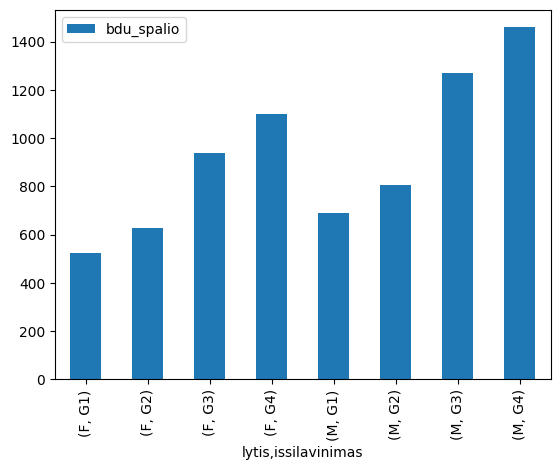

In [50]:
dugr.mean(numeric_only=True).plot(kind="bar")

<Axes: xlabel='lytis'>

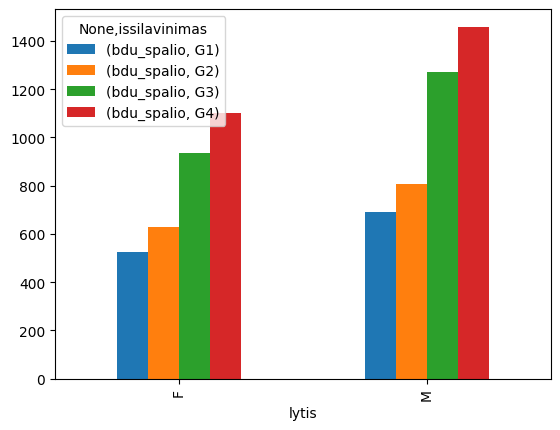

In [54]:
dugr.mean(numeric_only=True).unstack().plot(kind='bar')

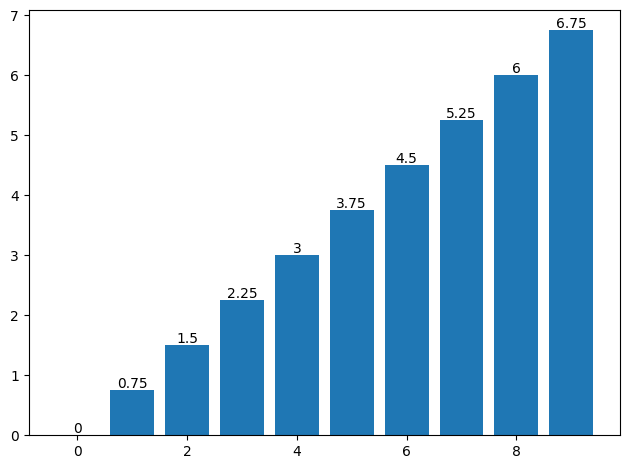

In [55]:
x=np.arange(0, 10) # ? - list with labels
fig, axis = plt.subplots()
#plotting code:
P = axis.bar(x, x*0.75)
axis.bar_label(P) # usdeda ant stupelio jo reiksme

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [56]:
# sugrupuokite dus2018 pagal išssilavinimą, suraskite vidutinį atlyginimą
# sugrupuokite pagal amžiaus grupes, suraskite vidutinį atlyginimą
# Sugrupuokite pagal amžiaus grupes IR išsilavinimą, atskirai vyrus, atskirai moteris, suraskite vidutinius atlyginimus.
# pritaikytkite ką tik rodytą informaciją ir
# vizualizuokite barais priklausomybę tarp išssilavinimo, amžiaus grupės ir vidutiniio atlyginimo

dus18small = dus18[['lytis', 'issilavinimas', 'bdu_spalio', 'amzius']]
dus18small.head()

,lytis,issilavinimas,bdu_spalio,amzius
0,F,G2,460,40-49
1,M,G2,1487,50-59
2,M,G2,1500,40-49
3,M,G2,1500,50-59
4,F,G2,400,40-49


In [60]:
# sugrupuokite dus2018 pagal išssilavinimą, suraskite vidutinį atlyginimą

vidutinis_atlyginimas = dus18small.groupby(by='issilavinimas')['bdu_spalio'].mean()
print(vidutinis_atlyginimas)

issilavinimas
G1     626.391679
G2     732.687157
G3    1094.764026
G4    1246.451196
Name: bdu_spalio, dtype: float64


In [76]:
# Sugrupuokite pagal amžiaus grupes IR išsilavinimą, atskirai vyrus, atskirai moteris, suraskite vidutinius atlyginimus.

vyrai = dus18small.query('lytis == "M"')
grupavimas2_vyrai = vyrai.groupby(by=['amzius', 'issilavinimas', 'lytis']).mean().unstack()
print(grupavimas2_vyrai)

                       bdu_spalio
lytis                           M
amzius issilavinimas             
14-29  G1              682.547826
       G2              793.322280
       G3             1181.346481
       G4             1222.638158
30-39  G1              770.419580
       G2              872.228456
       G3             1399.738047
       G4             1576.256348
40-49  G1              726.116162
       G2              835.153790
       G3             1312.243326
       G4             1642.363208
50-59  G1              664.846154
       G2              798.891181
       G3             1081.717762
       G4             1413.537578
60+    G1              588.522727
       G2              712.486520
       G3              972.589431
       G4             1243.578783


In [94]:
vyrai = dus18small.query('lytis == "M"')
grupavimas2_vyrai = vyrai.groupby(by=['issilavinimas']).mean(numeric_only=True)
print(grupavimas2_vyrai)

                bdu_spalio
issilavinimas             
G1              689.555297
G2              807.371033
G3             1269.916492
G4             1458.712409


In [101]:
# Sugrupuokite pagal amžiaus grupes IR išsilavinimą, atskirai vyrus, atskirai moteris, suraskite vidutinius atlyginimus.

moterys = dus18small.query('lytis == "F"')
grupavimas2_moterys = moterys.groupby(by=['amzius', 'issilavinimas', 'lytis']).mean(numeric_only=True).unstack()
print(grupavimas2_moterys)

                       bdu_spalio
lytis                           F
amzius issilavinimas             
14-29  G1              486.324561
       G2              597.760326
       G3              893.842186
       G4             1006.536000
30-39  G1              652.028169
       G2              660.934570
       G3             1001.732070
       G4             1232.746032
40-49  G1              581.450820
       G2              659.756448
       G3              972.870837
       G4             1188.780938
50-59  G1              513.460432
       G2              642.668338
       G3              841.646934
       G4             1037.370815
60+    G1              413.696629
       G2              557.674401
       G3              742.876190
       G4              968.746193


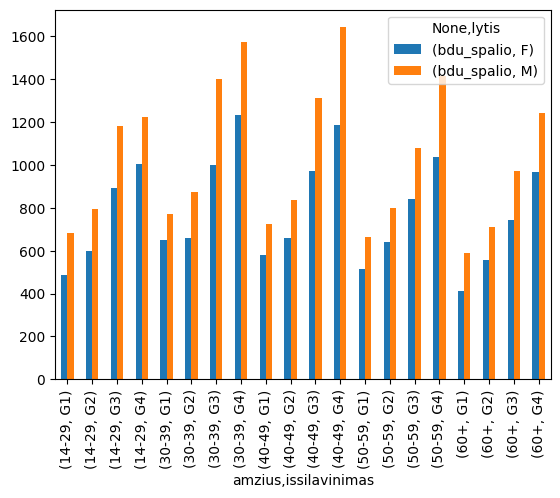

In [98]:
# pritaikytkite ką tik rodytą informaciją ir
# vizualizuokite barais priklausomybę tarp išssilavinimo, amžiaus grupės ir vidutiniio atlyginimo

# Negeras pvz:
grupavimas2 = dus18small.groupby(by=['amzius', 'issilavinimas', 'lytis']).mean(numeric_only=True).unstack().plot(kind='bar')

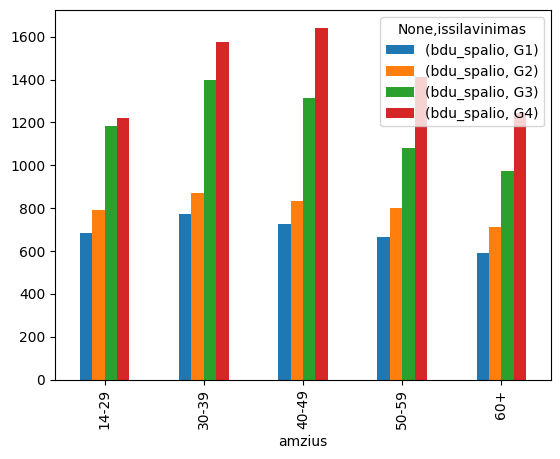

In [99]:
# pritaikytkite ką tik rodytą informaciją ir
# vizualizuokite barais priklausomybę tarp išssilavinimo, amžiaus grupės ir vidutiniio atlyginimo

grupavimas2_vyrai = dus18small.query('lytis == "M"').groupby(by=['amzius', 'issilavinimas']).mean(numeric_only=True).unstack().plot(kind='bar')

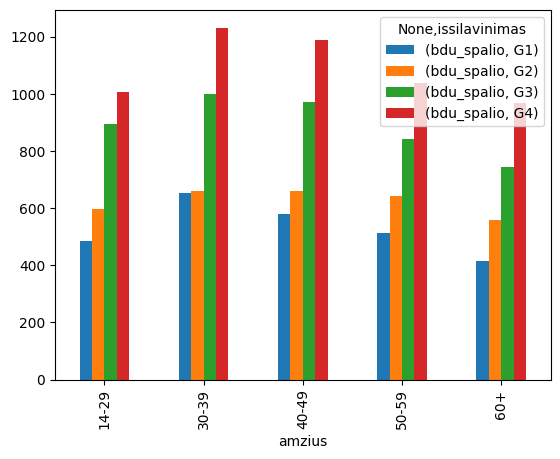

In [153]:
# pritaikytkite ką tik rodytą informaciją ir
# vizualizuokite barais priklausomybę tarp išssilavinimo, amžiaus grupės ir vidutiniio atlyginimo

grupavimas2_moterys = dus18small.query('lytis == "F"').groupby(by=['amzius', 'issilavinimas']).mean(numeric_only=True).unstack().plot(kind='bar')

In [ ]:
# rusiavimas didejimo arba mazejimo tvarka pagal tam tikra stulpeli
# jeigu stulpelyje zodziai, taisurikiuoja pagal abecele

In [106]:
miestai.sort_values(by='Atstumas iki sostinės').tail() #grazina 5 toliausiu smiestus

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
80,Salantai,311,1556 m.,1950 m.,9,1360
16,Kretinga,314,1253 m.,1609 m.,9,16840
17,Palanga,326,1253 m.,1791–1792 m.,9,15666
47,Skuodas,337,1253 m.,1572 m.,9,5289
60,Neringa,358,1385 m.,1961 m.,9,3464


In [115]:
# suraskite 5kis seniausius ir penkis naujausius miestus

def miesto_amzius(metai):
    return 2024-float(str(metai)[:4])

miestai['Miesto amžius']=miestai['Paminėjimo metai'].apply(miesto_amzius)

miestai.sort_values(by='Miesto amžius').tail()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Miesto amžius
13,Ukmergė,72,1201,1792 m.,16,20391,823.0
57,Švenčionys,84,1201,1800 m.,16,4139,823.0
56,Trakai,27,1201,XIV a. pab. – XV a. pr.,16,4238,823.0
40,Pasvalys,182,1201,1946 m.,11,6490,823.0
78,Ramygala,146,1201,1956 m.,11,1415,823.0


In [114]:
miestai.sort_values(by='Miesto amžius').head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Miesto amžius
14,Visaginas,152,1975 m.,1977 m.,10,18185,49.0
68,Venta,268,1966 m.,1978 m.,14,2213,58.0
23,Elektrėnai,48,1960 m.,1962 m.,16,11276,64.0
38,Naujoji Akmenė,269,1952 m.,1952 m.,14,7266,72.0
85,Baltoji Vokė,35,1950 m.,1958 m.,16,1052,74.0


In [213]:
# nuskaitykite NYPD.
#Suraskite, kiek kieviename rajone (BORO) buvo susišaudymų.
# prisidėkite stulpelį, kuriame būtų tik įvykio laiko valandos
# Suraskite, kiek ir kokios rasės buvo nusikaltėlių; aukų?
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.

nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME']) # isparsinu data ir laika
nypd['HR']= nypd['OCCUR_TIME'].dt.round('H').dt.hour # atskiriu tik valandas

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_11372\807761010.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME']) # isparsinu data ir laika
C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_11372\807761010.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  nypd['HR']= nypd['OCCUR_TIME'].dt.round('H').dt.hour # atskiriu tik valandas


In [214]:
# Suraskite, kiek ir kokios rasės buvo nusikaltėlių; aukų?

# nusikalteliu_rase = nypd.groupby(by=['PERP_RACE'])
# nusikalteliu_rase.groups.keys() # gavau nusikalteliu rasiu grupe, bet sito nereikejo

print('---Nusikalteliai---')
nypd['PERP_RACE'].value_counts()

---Nusikalteliai---


PERP_RACE
BLACK                             9336
UNKNOWN                           1839
WHITE HISPANIC                    1827
BLACK HISPANIC                    1007
WHITE                              239
ASIAN / PACIFIC ISLANDER           105
AMERICAN INDIAN/ALASKAN NATIVE       2
Name: count, dtype: int64

In [215]:
print('---Aukos---')
nypd['VIC_RACE'].value_counts()

---Aukos---


VIC_RACE
BLACK                             15470
WHITE HISPANIC                     3105
BLACK HISPANIC                     2085
WHITE                               578
ASIAN / PACIFIC ISLANDER            286
UNKNOWN                              93
AMERICAN INDIAN/ALASKAN NATIVE        9
Name: count, dtype: int64

In [216]:
print('---Kur kiek susisaudymu---')
nypd['BORO'].value_counts()

---Kur kiek susisaudymu---


BORO
BROOKLYN         8913
BRONX            6195
QUEENS           3225
MANHATTAN        2647
STATEN ISLAND     646
Name: count, dtype: int64

<Axes: xlabel='HR'>

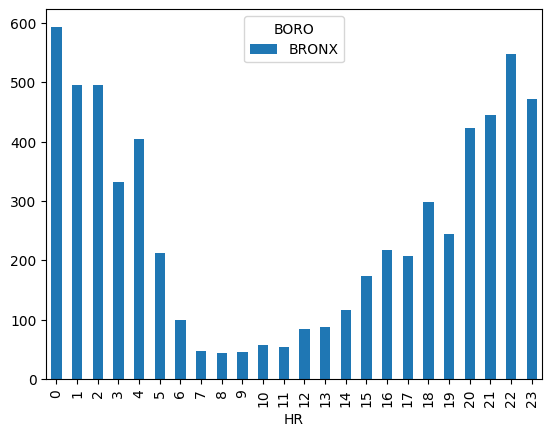

In [218]:
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.

nypd_small = nypd[['BORO','HR']]

nypd_small.query('BORO == "BRONX"').groupby(by=['HR']).value_counts().unstack().plot(kind='bar')

In [234]:
A = nypd_small.query('BORO == "BRONX"').value_counts().sort_index(ascending=True).reset_index() #reset_index() padaro normalia lentele
A

,BORO,HR,count
0,BRONX,0,593
1,BRONX,1,496
2,BRONX,2,496
3,BRONX,3,332
4,BRONX,4,404
5,BRONX,5,212
6,BRONX,6,99
7,BRONX,7,47
8,BRONX,8,44
9,BRONX,9,46


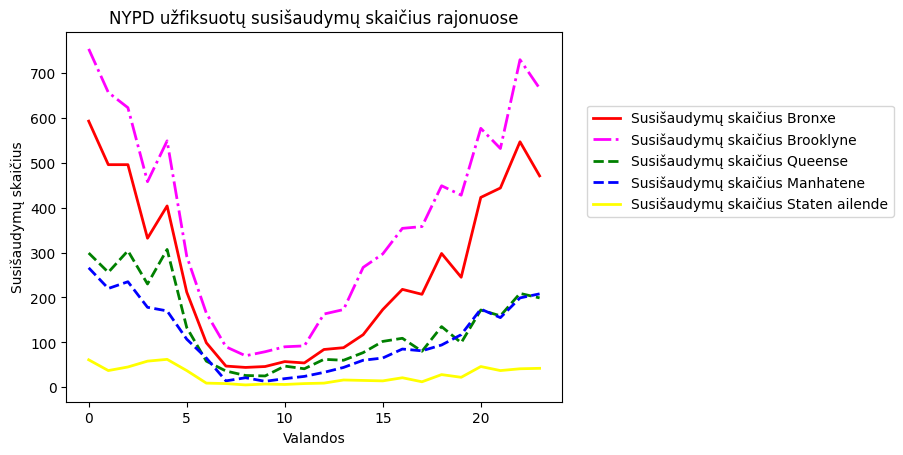

: 

In [246]:
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.
# Rodo tik vieno ajono statistika

A = nypd_small.query('BORO == "BRONX"').value_counts().sort_index(ascending=True).reset_index()
valandos= A['HR'].values
skaicius= A['count'].values

B = nypd_small.query('BORO == "BROOKLYN"').value_counts().sort_index(ascending=True).reset_index()
valandosBrooklyn= B['HR'].values
skaiciusBrooklyn= B['count'].values

C = nypd_small.query('BORO == "QUEENS"').value_counts().sort_index(ascending=True).reset_index()
valandosQueens= C['HR'].values
skaiciusQueens= C['count'].values

D = nypd_small.query('BORO == "MANHATTAN"').value_counts().sort_index(ascending=True).reset_index()
valandosManhattan= D['HR'].values
skaiciusManhattan= D['count'].values

E = nypd_small.query('BORO == "STATEN ISLAND"').value_counts().sort_index(ascending=True).reset_index()
valandosStaten= E['HR'].values
skaiciusStaten= E['count'].values

langas, grafikas = plt.subplots()
grafikas.plot(valandos, skaicius, label='Susišaudymų skaičius Bronxe', linewidth=2, color= 'red', linestyle="-")
grafikas.plot(valandosBrooklyn, skaiciusBrooklyn, label='Susišaudymų skaičius Brooklyne', linewidth=2, color= 'magenta', linestyle="dashdot")
grafikas.plot(valandosQueens, skaiciusQueens, label='Susišaudymų skaičius Queense', linewidth=2, color= 'green', linestyle="--")
grafikas.plot(valandosManhattan, skaiciusManhattan, label='Susišaudymų skaičius Manhatene', linewidth=2, color= 'blue', linestyle="--")
grafikas.plot(valandosStaten, skaiciusStaten, label='Susišaudymų skaičius Staten ailende', linewidth=2, color= 'yellow', linestyle="-")

grafikas.set_xlabel("Valandos")
grafikas.set_ylabel("Susišaudymų skaičius")
grafikas.set_title("NYPD užfiksuotų susišaudymų skaičius rajonuose")

grafikas.legend(loc=[1.05,0.5])

plt.show()

C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_11372\1054132299.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])


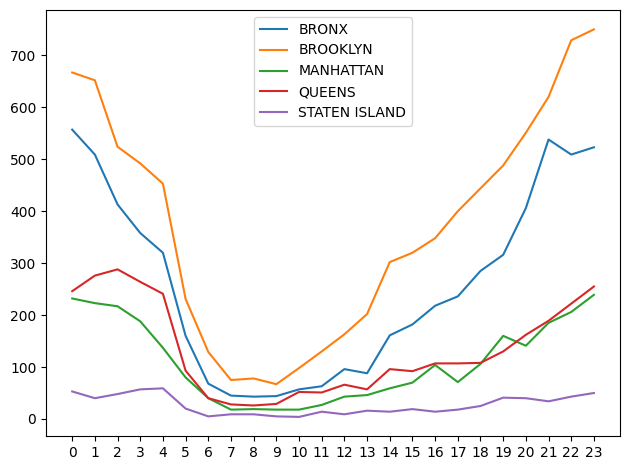

In [231]:
# destytojo Advanced dalies sprendimas:

nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])
nypd['H'] = nypd['OCCUR_TIME'].dt.hour
nypd = nypd[['BORO', 'PERP_RACE','VIC_RACE','H']]

nypdgr = nypd.groupby('BORO')

fig, axis = plt.subplots()
#plotting code: 
for boro in nypdgr.groups.keys(): # ciklas
    h = nypdgr.get_group(boro)['H'].value_counts().sort_index() # get_group(boro) komanda parenka is BORO stulpelio tik Bronx, paskui kita rajona kaskart prasisukant ciklui
    axis.plot(h.index, h.values, label=boro) # ideda i asis reiksmes

axis.set_xticks(h.index)

axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()